In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [107]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
Y_test= pd.read_csv('gender_submission.csv')
Y_test = Y_test.drop(['PassengerId'],axis=1)


In [108]:
train=train.drop(["Name","PassengerId","Cabin","Ticket"],axis=1)
test=test.drop(["Name","PassengerId","Cabin","Ticket"],axis=1)


In [109]:
#values in age and embarked missing
#use fill.na

# mean of the specific column
mean_value=train['Age'].mean()
train['Age'] = train['Age'].fillna(mean_value)
mean_value1=test['Age'].mean()
test['Age'] = test['Age'].fillna(mean_value1)




In [110]:
#S most common and  2 missing

train['Embarked'] = train['Embarked'].fillna('S')

test['Embarked'] = test['Embarked'].fillna('S')
train['Embarked'].describe()


count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [111]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [112]:
station = {"S": 0, "C": 1, "Q": 2}
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(station)

In [113]:

X_train= train.drop("Survived",axis=1)
Y_train= train["Survived"]

In [114]:
train = (train - train.mean())/(train.max()-train.min())

In [115]:
B=np.zeros(7)



In [116]:
alpha=0.008
iterations=12000
X_train.shape


(891, 7)

In [117]:
def sigmoid(X_train,B):
    result_sigmoid  = np.exp(X_train.dot(B))/(1+ np.exp(X_train.dot(B)))
    return  result_sigmoid



In [118]:
 
m=len(Y_train)

def cost_function(X_train,Y_train,B):
    h=sigmoid(X_train,B)
    a=np.log(h)
    b=np.log(1-h)
    c=Y_train
    d= (1-Y_train)
    cost_function=(-c*a - b*d)/m
    cost_function=cost_function.sum()/m
    return cost_function



In [119]:
def weightchange(X_train, Y_train, B, alpha):
        m =len(X_train)
        h = sigmoid(X_train,B)
        loss = h-Y_train
        gradient = X_train.T.dot(loss)/m
        
        B = B - alpha*gradient
        return B


In [120]:
#features;X_train ;(891,8)
#labels :Y_train; (891,)
#weights ;B ;(8,)


def train_(X_train, Y_train, B, alpha):
    #cost_history=[0]*iterations#
    cost_history = []
    for iteration in range(iterations):
        B = weightchange(X_train, Y_train, B, alpha)
        
        cost = cost_function(X_train, Y_train, B)
        cost_history.append(cost)   
             
    return B, cost_history


In [121]:
newB,cost_history= train_(X_train, Y_train, B, alpha)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


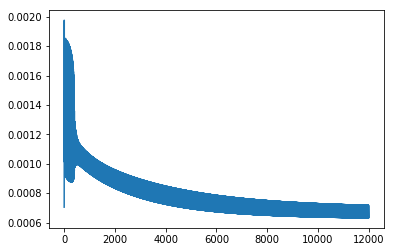

In [122]:
plt.plot(cost_history)

In [123]:
h=sigmoid(test,newB)
h.describe()

count    417.000000
mean       0.248312
std        0.279329
min        0.000712
25%        0.040734
50%        0.079413
75%        0.516227
max        0.902591
dtype: float64

In [124]:
Y_pred = sigmoid(test,newB)
Y_pred

0      0.047236
1      0.176428
2      0.019776
3      0.040878
4      0.404710
5      0.079413
6      0.626333
7      0.038199
8      0.707449
9      0.019616
10     0.034364
11     0.049910
12     0.778206
13     0.006568
14     0.465669
15     0.658146
16     0.080756
17     0.071920
18     0.388001
19     0.359831
20     0.027220
21     0.081075
22     0.769916
23     0.201873
24     0.584667
25     0.007053
26     0.864420
27     0.066694
28     0.065639
29     0.015615
         ...   
388    0.093214
389    0.019637
390    0.198325
391    0.475666
392    0.058053
393    0.025349
394    0.005771
395    0.806013
396    0.080217
397    0.487573
398    0.052687
399    0.056493
400    0.861467
401    0.024348
402    0.863041
403    0.216987
404    0.044294
405    0.130697
406    0.050799
407    0.055446
408    0.622977
409    0.656482
410    0.623008
411    0.749158
412    0.516227
413    0.034387
414    0.796912
415    0.022241
416    0.034387
417    0.022194
Length: 418, dtype: floa

In [125]:
def sort(Y_pred):
    return 1 if Y_pred >=0.5 else 0


    

In [126]:
Y_pred=Y_pred.map(sort)
type(Y_pred)



pandas.core.series.Series

In [127]:
Y_pred.to_frame()


,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [128]:
type(Y_test)

pandas.core.frame.DataFrame

In [129]:
Y_pred.shape

(418,)

In [130]:
def compare(Y_pred,Y_test):
    diff = Y_pred - Y_test
    return np.count_nonzero(diff)
compare(Y_pred,Y_test)


175142

In [131]:



a=Y_pred.values
b=Y_train.values
c=Y_test.values
a.reshape((418,1))
b.reshape((891,1))
c.reshape((418,1))


array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [132]:
m=len(Y_test)


In [133]:
print('Train set accuracy: ', count/418)

Train set accuracy:  0.8708133971291866


In [134]:
m=len(Y_test)
count=0
for i in range(m):
    if a[i] == c[i]:
        count=count+1
count/418

0.8923444976076556

In [135]:
np.count_nonzero(Y_pred)

107

In [136]:
np.count_nonzero(Y_test)

152

In [137]:
m=len(Y_test)

In [138]:
def compare(Y_pred,Y_test):
    diff = Y_pred - Y_test
    return np.count_nonzero(diff)
compare(a,c)


75734